# Import Libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [36]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Data Cleansing

## General Info & Missing Values

In [37]:
pd.set_option('max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [39]:
# number of missing values per column
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [40]:
# number of duplicated data
df.duplicated().sum()

0

In [41]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [57]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

Observasi:
1. Data mempunyai 35 kolom and 1470 baris
2. Tidak ada missing dan duplicate value
3. 'EmployeeCount', 'Over18', 'StandardHours' hanya ada 1 unique value dan 'EmployeeNumber' punya 1470 unique values. Kolom ini tidak akan digunakan untuk analisa jadi bisa di drop.

# Data Understanding

## Statistical Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
categoricals = ['Attrition',	'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

numericals = ['Age', 'DailyRate', 'DistanceFromHome',	'Education',	'EnvironmentSatisfaction', 'HourlyRate',	'JobInvolvement',	'JobLevel', 'JobSatisfaction', 'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked', 'PercentSalaryHike',	'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager']

In [ ]:
# numerical statistical sumary
df[numericals].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observasi:
1. Rentang nilai min dan max masih wajar.
2. Rentang nilai mean dan median tidak terlalu jauh 
3. Usia karyawan termuda 18 tahun dan tertua 60 tahun
4. Gaji per bulan terendah $1,009 dan tertinggi $19,999




In [ ]:
# describe method on categorical data
df[categoricals].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [ ]:
print(df['Attrition'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


In [ ]:
print(df['Gender'].value_counts())

Male      882
Female    588
Name: Gender, dtype: int64


Observasi:
1. Karyawan yang resign dari perusahaan ada 237 orang
2. Perusahaan jarang mengadakan perjalanan bisnis
3. R&D Department memiliki lebih banyak karyawan
4. Pendidikan karyawan dari Life Sciences
5. Karyawan laki - laki lebih banyak dari karyawan perempuan
6. Job Role sebagai sales executive lebih mendominasi
7. Karyawan banyak yang sudah menikah
8. Sebagian besar karyawan tidak lembur

# Univariate Analysis

## Boxplot to detect outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<Figure size 576x360 with 0 Axes>

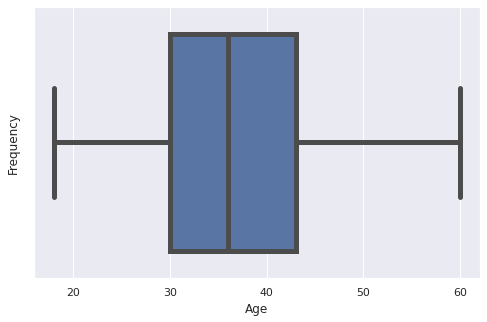

<Figure size 576x360 with 0 Axes>

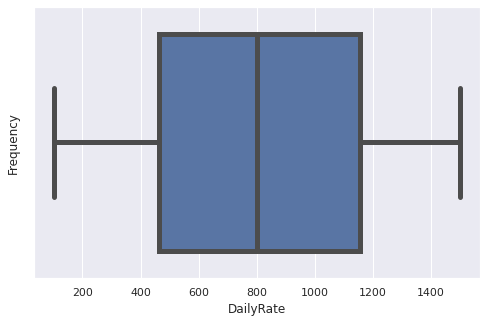

<Figure size 576x360 with 0 Axes>

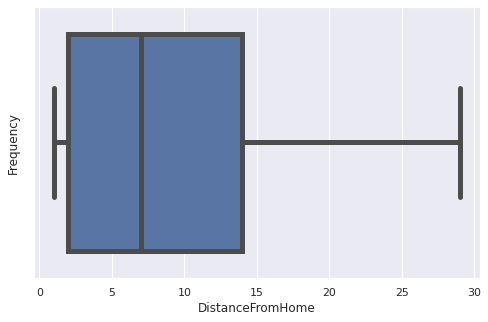

<Figure size 576x360 with 0 Axes>

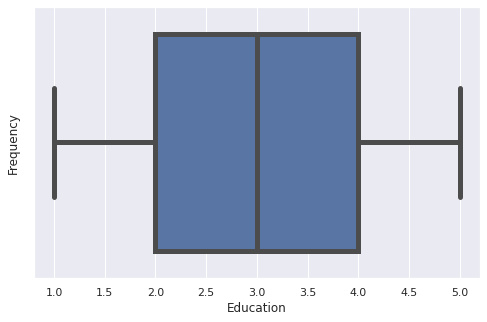

<Figure size 576x360 with 0 Axes>

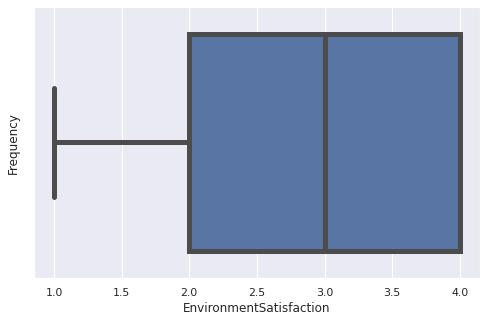

<Figure size 576x360 with 0 Axes>

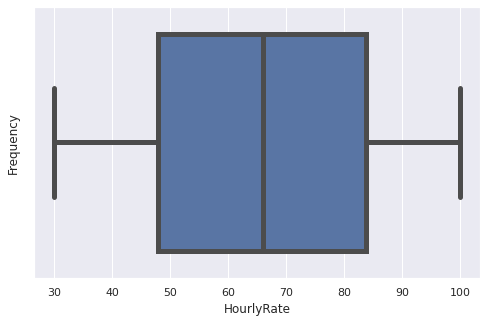

<Figure size 576x360 with 0 Axes>

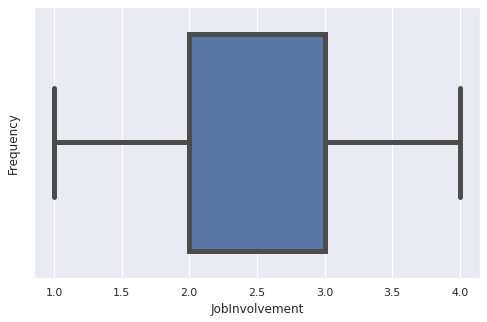

<Figure size 576x360 with 0 Axes>

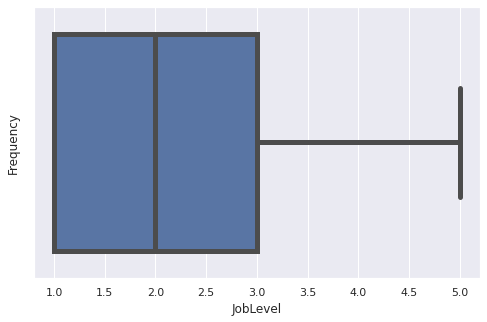

<Figure size 576x360 with 0 Axes>

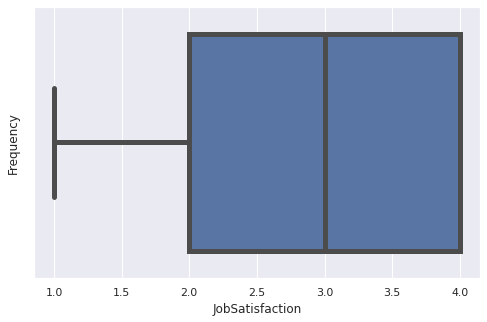

<Figure size 576x360 with 0 Axes>

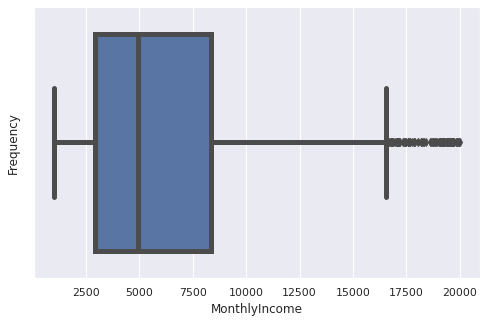

<Figure size 576x360 with 0 Axes>

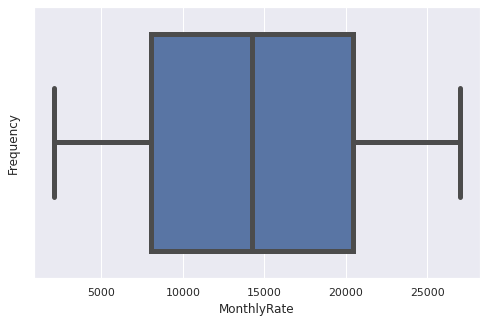

<Figure size 576x360 with 0 Axes>

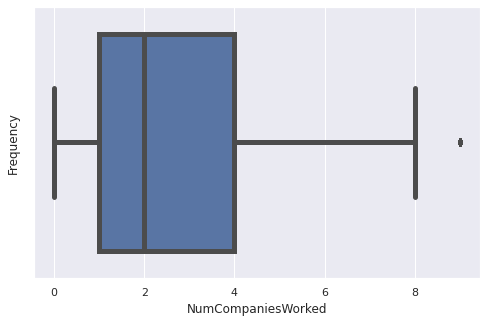

<Figure size 576x360 with 0 Axes>

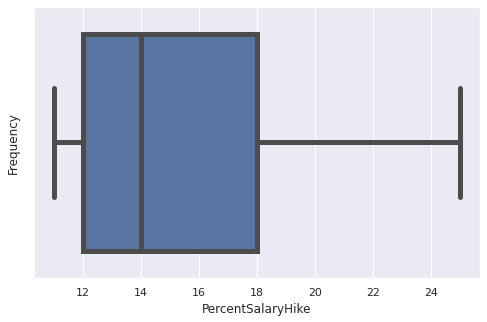

<Figure size 576x360 with 0 Axes>

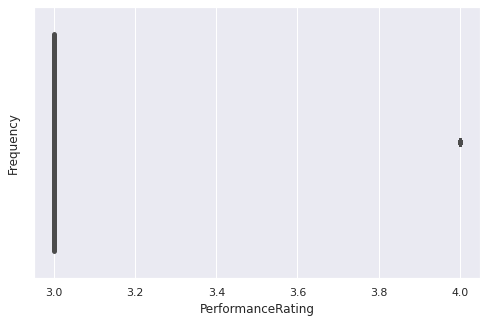

<Figure size 576x360 with 0 Axes>

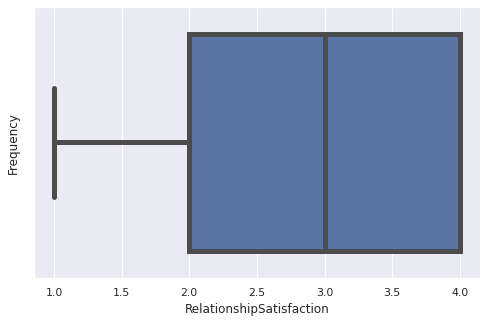

<Figure size 576x360 with 0 Axes>

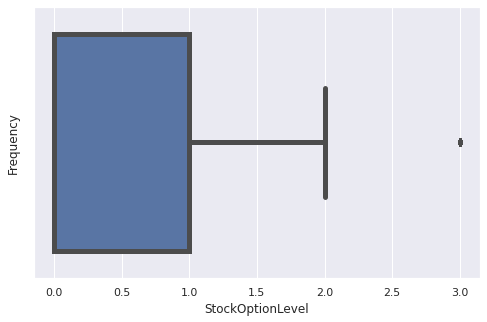

<Figure size 576x360 with 0 Axes>

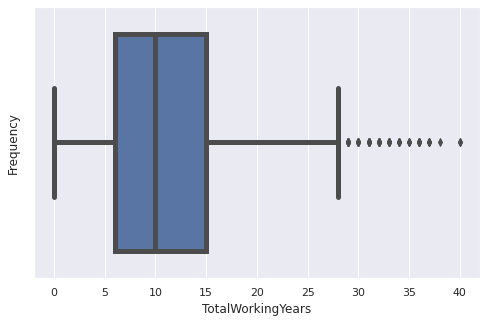

<Figure size 576x360 with 0 Axes>

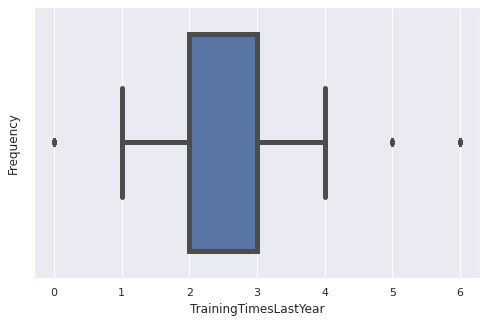

<Figure size 576x360 with 0 Axes>

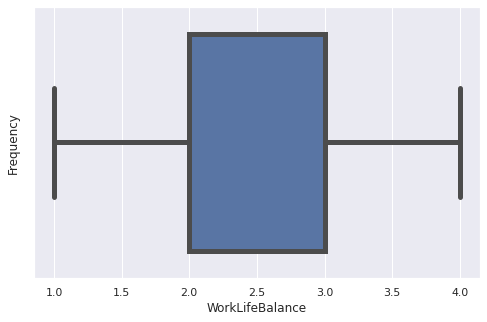

<Figure size 576x360 with 0 Axes>

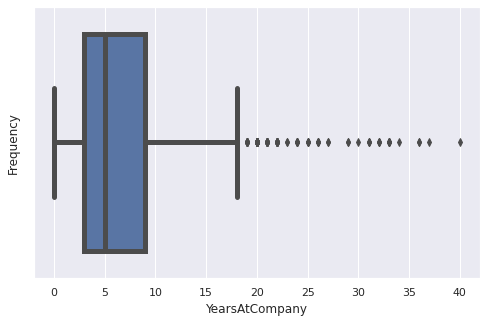

<Figure size 576x360 with 0 Axes>

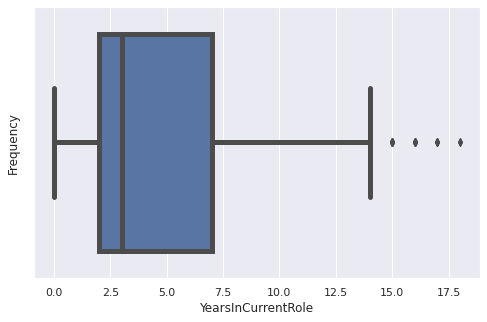

<Figure size 576x360 with 0 Axes>

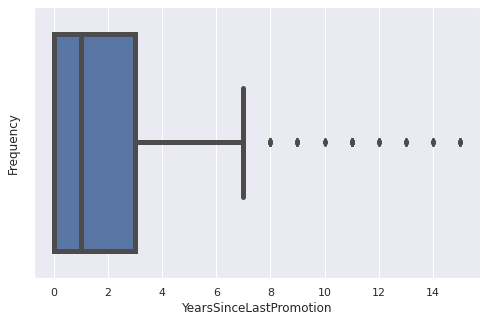

<Figure size 576x360 with 0 Axes>

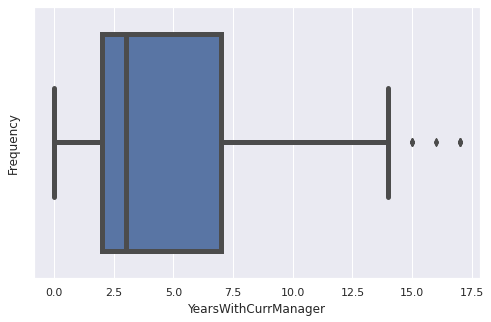

In [ ]:
for i in numericals:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 5.0)

**tidak ada outlier** = age, daily rate, distance from home, education, hourly rate, job involvement, job level, job satisfaction, monthly rate, percent salary hike, relationship satisfaction, work life balance

**ada outlier** = monthly income, numcompanies worked, performance rating, stock option level, total working years, training time last year, yearsatcompany, yearsincurrentrole, years since last promotion, years with curr manager

In [42]:
# Exclude outliers using IQR
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

df[(df['MonthlyIncome'] >= Lower_Whisker) & (df['MonthlyIncome'] <= Upper_Whisker)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


# Bivariate Analysis

In [43]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [44]:
Gender = df.groupby("Gender")["Attrition"]
Gender.value_counts()

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64

Karyawan laki - laki lebih banyak yang resign dibanding karyawan perempuan

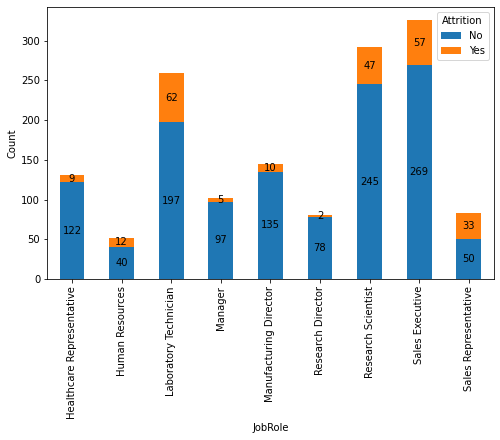

In [ ]:
ax = df.groupby(['JobRole', 'Attrition']).size().unstack().plot(kind='bar', figsize=(8, 5), xlabel='JobRole', ylabel='Count', stacked=True)

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:0.0f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

Laboratory Technician, Research Scientist, dan Sales Executive merupakan job role yang karyawannya paling banyak resign

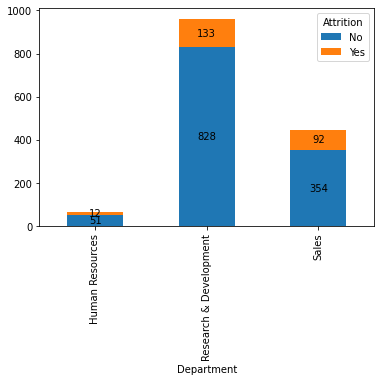

In [ ]:
ex = df.groupby(['Department', 'Attrition']).size().unstack().plot(kind='bar', stacked=True)
for rect in ex.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:0.0f}'  
    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        ex.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

Karyawan yang paling banyak resign dari Departemen Research dan Development

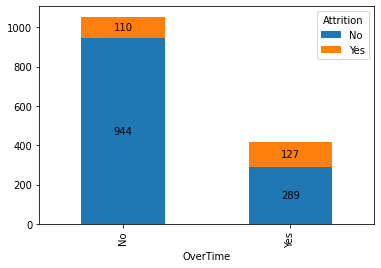

In [ ]:
bx = df.groupby(['OverTime', 'Attrition']).size().unstack().plot(kind='bar', stacked=True)

for rect in bx.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:0.0f}'  
    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        bx.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

Karyawan yang sering lembur cenderung resign 

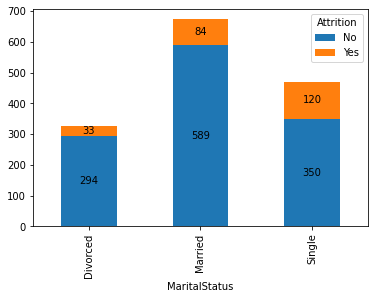

In [ ]:
cx = df.groupby(['MaritalStatus', 'Attrition']).size().unstack().plot(kind='bar', stacked=True)

for rect in cx.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:0.0f}'  
    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        cx.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

Karyawan single paling banyak resign

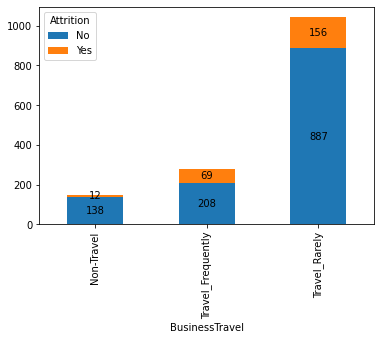

In [ ]:
dx = df.groupby(['BusinessTravel', 'Attrition']).size().unstack().plot(kind='bar', stacked=True)
for rect in dx.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:0.0f}'  
    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        dx.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

Karyawan yang jarang mendapatkan trip bisnis banyak yang resign

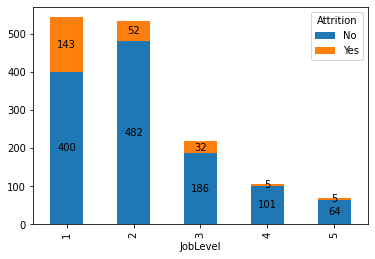

In [ ]:
fx = df.groupby(['JobLevel', 'Attrition']).size().unstack().plot(kind='bar', stacked=True)
for rect in fx.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:0.0f}'  
    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        fx.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

Karyawan dengan Job Level rendah banyak yang resign

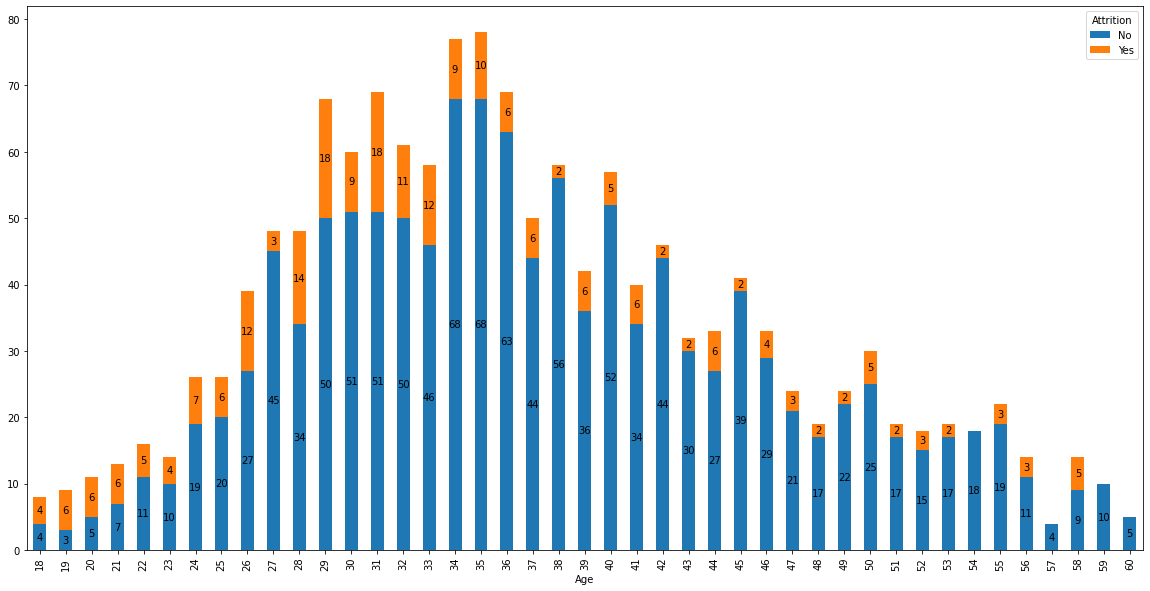

In [ ]:
gx = df.groupby(['Age', 'Attrition']).size().unstack().plot(kind='bar', figsize=(20, 10), stacked=True)
for rect in gx.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:0.0f}'  
    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        gx.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

Karyawan berusia muda cenderung resign dari perusahaan dibanding karyawan yang berusia tua

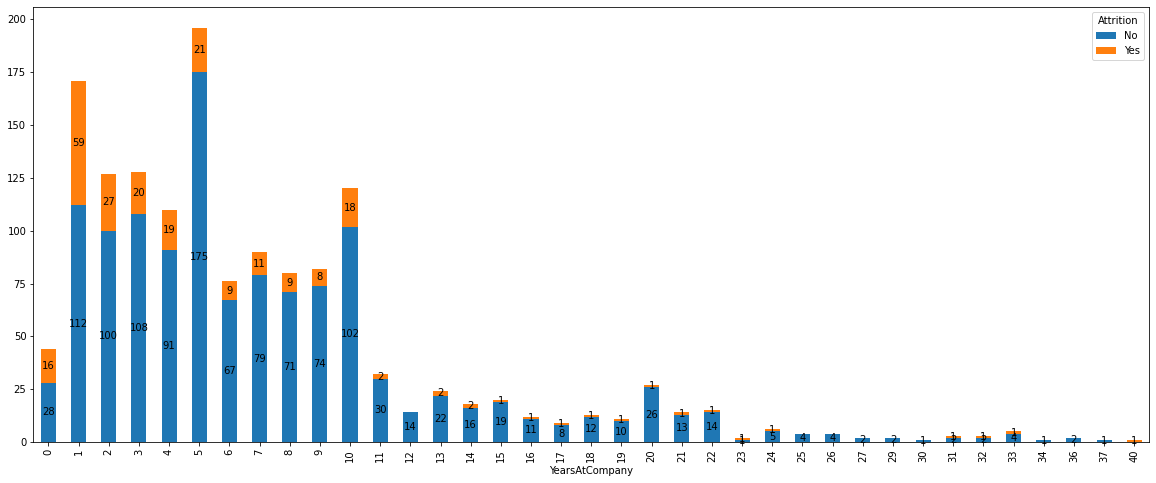

In [ ]:
hx = df.groupby(['YearsAtCompany', 'Attrition']).size().unstack().plot(kind='bar', figsize=(20, 8), stacked=True)
for rect in hx.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:0.0f}'  
    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        hx.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

Karyawan dengan masa kerja ≤10 tahun banyak yang berhenti

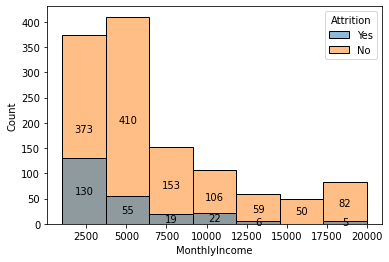

In [ ]:
plt.figure()
ix = sns.histplot(data = df, x = "MonthlyIncome", hue = "Attrition", bins = 7)
for rect in ix.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:0.0f}'  
    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        ix.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

Karyawan dengan monthly income rendah banyak yang resign


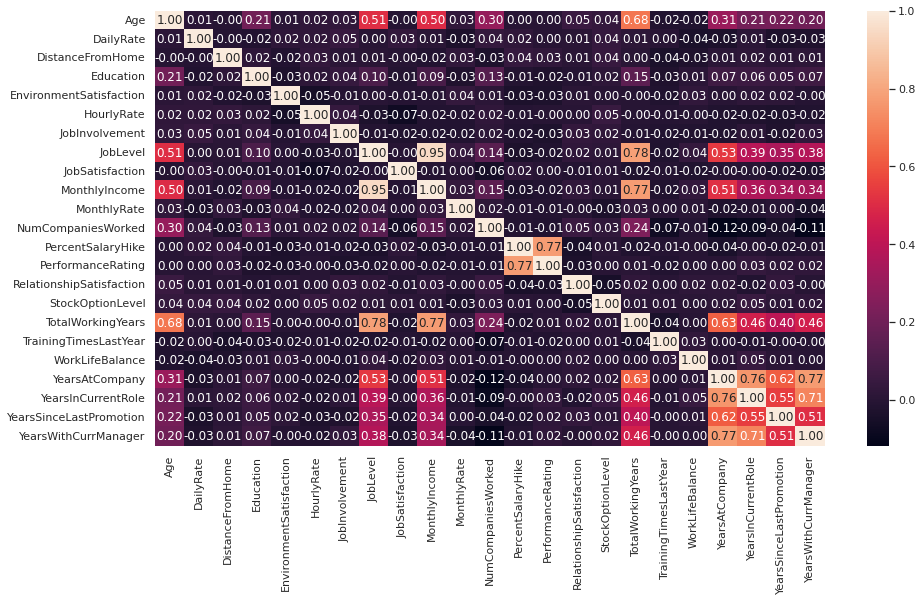

In [ ]:
# correlation heatmap
correlation = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation, annot=True,  fmt='.2f')

1. Monthly Income dan Job Level memiliki korelasi tinggi (0,95)
2. Total Working Years dan Job Level memiliki korelasi tinggi (0,78)
3. Total Working Years dan Monthly Income memiliki korelasi tinggi (0,77)
4. Performance Rating dan Percent Salary Hike memiliki korelasi tinggi (0,77)

##Machine Learning

###Categorical Column Transformation

In [45]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [46]:
# Onehot Encoding get dummies
onehot_columns = ['BusinessTravel', 'Department','EducationField','Gender', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(df, columns = onehot_columns)

In [47]:
attrition_dict = {
    'Yes' : 1,
    'No' : 0
}
df['Attrition'] = df['Attrition'].map(attrition_dict)

In [48]:
overtime_dict = {
    'Yes' : 1,
    'No' : 0
}
df['OverTime'] = df['OverTime'].map(overtime_dict)

In [58]:
df.dtypes

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceL

In [51]:
df['Attrition'].value_counts() 

0    1233
1     237
Name: Attrition, dtype: int64

Imbalanced dataset karena 1233 (84%) karyawan masih bekerja di perusahaan sedangkan 237 (16%) karwayawan resign dari perusahaan

### Dataset Splitting

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
df_train, df_test = train_test_split(df, 
                                     test_size = 0.25, random_state = 3) 

In [62]:
x_train_data = df_train.loc[:, df_train.columns!='Attrition']
y_train_data = df_train.loc[:, df_train.columns=='Attrition']

x_test_data = df_test.loc[:, df_test.columns!='Attrition']
y_test_data = df_test.loc[:, df_test.columns=='Attrition']

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [64]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

In [66]:
base_model = RandomForestClassifier() #(random_state = 1, n_jobs = -1)
base_model.fit(x_train_data, y_train_data)
evaluate(base_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.845108695652174
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       310
           1       0.56      0.09      0.15        58

    accuracy                           0.85       368
   macro avg       0.70      0.54      0.53       368
weighted avg       0.81      0.85      0.79       368

------
Assuming 1 as positive, we get:

True Positive: 5
True Negative: 306
False Positive: 4
False Negative: 53

Precision: 0.5555555555555556
Recall: 0.08620689655172414
F1-Score: 0.1492537313432836


### Undersampling

In [67]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print("Sebelum di undersample", Counter(y_train_data['Attrition']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train_data, 
                                                        y_train_data)

# summarize class distribution
print("Setelah di undersample", Counter(y_train_under['Attrition']))

Sebelum di undersample Counter({0: 923, 1: 179})
Setelah di undersample Counter({0: 179, 1: 179})


In [68]:
under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model.fit(x_train_under, y_train_under)
evaluate(under_model, x_test_data, y_test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.7418478260869565
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       310
           1       0.34      0.66      0.44        58

    accuracy                           0.74       368
   macro avg       0.63      0.71      0.64       368
weighted avg       0.83      0.74      0.77       368

------
Assuming 1 as positive, we get:

True Positive: 38
True Negative: 235
False Positive: 75
False Negative: 20

Precision: 0.336283185840708
Recall: 0.6551724137931034
F1-Score: 0.4444444444444444


Recall yang meningkat berarti di antara data-data yang sebenarnya positif, 65% dari data-data tersebut diprediksi sebagai positif (correctly predicts positive data). Tapi, precisionnya rendah.

###Oversampling

In [69]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['Attrition']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_data, y_train_data)

# summarize class distribution
print(Counter(y_train_SMOTE['Attrition']))

Counter({0: 923, 1: 179})
Counter({0: 923, 1: 923})


In [70]:
over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, x_test_data, y_test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.8532608695652174
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       310
           1       0.59      0.22      0.32        58

    accuracy                           0.85       368
   macro avg       0.73      0.60      0.62       368
weighted avg       0.83      0.85      0.82       368

------
Assuming 1 as positive, we get:

True Positive: 13
True Negative: 301
False Positive: 9
False Negative: 45

Precision: 0.5909090909090909
Recall: 0.22413793103448276
F1-Score: 0.32499999999999996


Combining Oversampling and Undersampling

In [71]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1) 
over = SMOTE(sampling_strategy=0.4) 
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data) 
evaluate(pipeline, x_test_data, y_test_data)

/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


Accuracy: 0.842391304347826
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       310
           1       0.50      0.17      0.26        58

    accuracy                           0.84       368
   macro avg       0.68      0.57      0.58       368
weighted avg       0.81      0.84      0.81       368

------
Assuming 1 as positive, we get:

True Positive: 10
True Negative: 300
False Positive: 10
False Negative: 48

Precision: 0.5
Recall: 0.1724137931034483
F1-Score: 0.25641025641025644


###Finding Best Coefficient

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore')

oversampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] 
undersampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

result = {
    'over_coef':[],
    'under_coef':[],
    'acc':[],
    'prec':[],
    'recall':[],
    'f1':[]
}

for over_score in tqdm(oversampling_coef):
    for under_score in undersampling_coef:
        try:
            combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
            over = SMOTE(sampling_strategy = over_score)
            under = RandomUnderSampler(sampling_strategy = under_score)
            steps = [('o', over), ('u', under), ('model', combined_model)]
            pipeline = Pipeline(steps = steps)

            pipeline.fit(x_train_data, y_train_data)
            y_pred = pipeline.predict(x_test_data)

            result['over_coef'].append(over_score)
            result['under_coef'].append(under_score)
            result['acc'].append(accuracy_score(y_test_data, y_pred))
            result['prec'].append(precision_score(y_test_data, y_pred))
            result['recall'].append(recall_score(y_test_data, y_pred))
            result['f1'].append(f1_score(y_test_data, y_pred))
        except:
            pass

100%|██████████| 10/10 [00:26<00:00,  2.68s/it]


In [73]:
df_result = pd.DataFrame(result)

In [74]:
df_result

,over_coef,under_coef,acc,prec,recall,f1
0,0.2,0.2,0.858696,0.750000,0.155172,0.257143
1,0.2,0.3,0.853261,0.611111,0.189655,0.289474
2,0.2,0.4,0.839674,0.483871,0.258621,0.337079
3,0.2,0.5,0.823370,0.428571,0.362069,0.392523
4,0.2,0.6,0.812500,0.412698,0.448276,0.429752
5,0.2,0.7,0.820652,0.444444,0.551724,0.492308
6,0.2,0.8,0.771739,0.358696,0.568966,0.440000
7,0.2,0.9,0.779891,0.386139,0.672414,0.490566
8,0.2,1.0,0.766304,0.370370,0.689655,0.481928
9,0.3,0.3,0.855978,0.692308,0.155172,0.253521


In [75]:
df_result.sort_values('prec', ascending = False)

,over_coef,under_coef,acc,prec,recall,f1
0,0.2,0.2,0.858696,0.750000,0.155172,0.257143
9,0.3,0.3,0.855978,0.692308,0.155172,0.253521
35,0.7,0.7,0.861413,0.684211,0.224138,0.337662
17,0.4,0.4,0.853261,0.666667,0.137931,0.228571
30,0.6,0.6,0.855978,0.647059,0.189655,0.293333
25,0.5,0.6,0.855978,0.619048,0.224138,0.329114
42,0.9,0.9,0.853261,0.611111,0.189655,0.289474
1,0.2,0.3,0.853261,0.611111,0.189655,0.289474
10,0.3,0.4,0.850543,0.600000,0.155172,0.246575
39,0.8,0.8,0.850543,0.565217,0.224138,0.320988


In [76]:
df_result.sort_values('recall', ascending = False)

,over_coef,under_coef,acc,prec,recall,f1
8,0.2,1.0,0.766304,0.370370,0.689655,0.481928
7,0.2,0.9,0.779891,0.386139,0.672414,0.490566
16,0.3,1.0,0.785326,0.384615,0.603448,0.469799
6,0.2,0.8,0.771739,0.358696,0.568966,0.440000
5,0.2,0.7,0.820652,0.444444,0.551724,0.492308
23,0.4,1.0,0.815217,0.421875,0.465517,0.442623
15,0.3,0.9,0.796196,0.376812,0.448276,0.409449
4,0.2,0.6,0.812500,0.412698,0.448276,0.429752
13,0.3,0.7,0.815217,0.413793,0.413793,0.413793
14,0.3,0.8,0.796196,0.369231,0.413793,0.390244


In [77]:
df_result.sort_values('f1', ascending = False)

,over_coef,under_coef,acc,prec,recall,f1
5,0.2,0.7,0.820652,0.444444,0.551724,0.492308
7,0.2,0.9,0.779891,0.386139,0.672414,0.490566
8,0.2,1.0,0.766304,0.370370,0.689655,0.481928
16,0.3,1.0,0.785326,0.384615,0.603448,0.469799
23,0.4,1.0,0.815217,0.421875,0.465517,0.442623
6,0.2,0.8,0.771739,0.358696,0.568966,0.440000
4,0.2,0.6,0.812500,0.412698,0.448276,0.429752
29,0.5,1.0,0.831522,0.460000,0.396552,0.425926
12,0.3,0.6,0.847826,0.526316,0.344828,0.416667
13,0.3,0.7,0.815217,0.413793,0.413793,0.413793


Untuk mendapatkan model yang: 
*   precision tinggi (75%), berarti ambil over = 0,2, under = 0,2
*   recall tinggi (69%), berarti ambil over = 0,2, under = 1 
*   f1 score tinggi (49,23%), berarti ambil over = 0,2 , under = 0,7

Kita memilih menghilang false negative (recall tinggi) karena lebih baik orang yang diperkirakan resign namun ternyata tidak resign (false positive) daripada diperkirakan tidak resign namun ternyata resign (false negative)


##K-Nearest Neighbor

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [81]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_under, y_train_under)

KNeighborsClassifier()

In [82]:
evaluate(knn)

Accuracy: 0.5896739130434783
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.88      0.60      0.71       310
           1       0.20      0.55      0.30        58

    accuracy                           0.59       368
   macro avg       0.54      0.57      0.50       368
weighted avg       0.77      0.59      0.65       368

------
Assuming 1 as positive, we get:

True Positive: 32
True Negative: 185
False Positive: 125
False Negative: 26

Precision: 0.20382165605095542
Recall: 0.5517241379310345
F1-Score: 0.2976744186046512


In [83]:
#We will try n_neighbors value from 3 to 15 and see if we can improve the accuracy.
#Let's try to find the n_neighbors that give us the best recall
def evaluate_recall(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    return recall

In [85]:
recall_dict = {
    'n':[],
    'recall':[]
}
for n in [3,5,7,9,11,13,15]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_under, y_train_under)
    recall = evaluate_recall(knn)
    recall_dict['n'].append(n)
    recall_dict['recall'].append(recall)
    
recall_df = pd.DataFrame(recall_dict)

In [86]:
recall_df

,n,recall
0,3,0.620690
1,5,0.551724
2,7,0.603448
3,9,0.586207
4,11,0.534483
5,13,0.500000
6,15,0.500000


best neighbors value for our dataset is 3

##Logistic Regression

In [87]:
logreg = LogisticRegression()
logreg.fit(x_train_under, y_train_under)

LogisticRegression()

In [88]:
evaluate(logreg)

Accuracy: 0.5896739130434783
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.89      0.58      0.71       310
           1       0.22      0.62      0.32        58

    accuracy                           0.59       368
   macro avg       0.55      0.60      0.51       368
weighted avg       0.79      0.59      0.65       368

------
Assuming 1 as positive, we get:

True Positive: 36
True Negative: 181
False Positive: 129
False Negative: 22

Precision: 0.21818181818181817
Recall: 0.6206896551724138
F1-Score: 0.32286995515695066


## Decision Tree

In [90]:
dt = DecisionTreeClassifier()
dt.fit(x_train_under, y_train_under)
evaluate(dt)

Accuracy: 0.6141304347826086
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.91      0.60      0.72       310
           1       0.24      0.67      0.35        58

    accuracy                           0.61       368
   macro avg       0.57      0.64      0.54       368
weighted avg       0.80      0.61      0.67       368

------
Assuming 1 as positive, we get:

True Positive: 39
True Negative: 187
False Positive: 123
False Negative: 19

Precision: 0.24074074074074073
Recall: 0.6724137931034483
F1-Score: 0.35454545454545455
